In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)

## Reddit Post Future Popularity Prediction

In [282]:
df_stock_market_reddit = pd.read_csv("../datasets/StockMarket.csv")

In [283]:
df_stock_market_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   created_utc             995 non-null    float64
 1   score                   995 non-null    int64  
 2   domain                  995 non-null    object 
 3   id                      995 non-null    object 
 4   title                   995 non-null    object 
 5   ups                     995 non-null    int64  
 6   downs                   995 non-null    int64  
 7   num_comments            995 non-null    int64  
 8   permalink               995 non-null    object 
 9   selftext                413 non-null    object 
 10  link_flair_text         0 non-null      float64
 11  over_18                 995 non-null    bool   
 12  thumbnail               995 non-null    object 
 13  subreddit_id            995 non-null    object 
 14  edited                  995 non-null    ob

In [284]:
df_stock_market_reddit.head()

,created_utc,score,domain,id,title,ups,downs,num_comments,permalink,selftext,link_flair_text,over_18,thumbnail,subreddit_id,edited,link_flair_css_class,author_flair_css_class,is_self,name,url,distinguished
0,1.358725e+09,62,self.StockMarket,16yf5b,"I am a professional, self-employed trader. AMAA.",79,17,139,http://www.reddit.com/r/StockMarket/comments/1...,Per request. Please understand I can only ans...,NaN,False,self,t5_2qjuv,False,NaN,NaN,True,t3_16yf5b,http://www.reddit.com/r/StockMarket/comments/1...,NaN
1,1.365629e+09,40,i.imgur.com,1c39ya,"Bitcoin got slammed today, chart of the day:",53,13,19,http://www.reddit.com/r/StockMarket/comments/1...,NaN,NaN,False,http://a.thumbs.redditmedia.com/FeytUv4f6U8H2W...,t5_2qjuv,False,NaN,NaN,False,t3_1c39ya,http://i.imgur.com/k0efWXQ.jpg,NaN
2,1.338268e+09,42,businessinsider.com,u9w4q,Report That Caused Spanish Markets To Collapse,59,17,1,http://www.reddit.com/r/StockMarket/comments/u...,NaN,NaN,False,http://e.thumbs.redditmedia.com/2EWxEqGoJ2tAca...,t5_2qjuv,False,NaN,NaN,False,t3_u9w4q,http://www.businessinsider.com/el-mundo-report...,NaN
3,1.342200e+09,27,self.StockMarket,wia8f,Intro to technical analysis,34,7,9,http://www.reddit.com/r/StockMarket/comments/w...,Lots of new subscribers here asking what the h...,NaN,False,self,t5_2qjuv,False,NaN,NaN,True,t3_wia8f,http://www.reddit.com/r/StockMarket/comments/w...,NaN
4,1.368008e+09,30,self.StockMarket,1dx9t9,90% of people who try Options trading lose mon...,51,21,34,http://www.reddit.com/r/StockMarket/comments/1...,What most people don't understand is that Opt...,NaN,False,self,t5_2qjuv,False,NaN,NaN,True,t3_1dx9t9,http://www.reddit.com/r/StockMarket/comments/1...,NaN


## Clean Data
- Keeping
    - `score`
    - `title`
    - `ups`
    - `downs`
    - `num_comments`
    - `selftext`
    - Modern API has all of them
- Removed that need explanations
    - `domain`: seems to be the domain of any embedded media, or just the subreddit

In [285]:
df_stock_market_reddit.drop(columns=["domain",
                                     "created_utc",
                                       "id",
                                       "permalink",
                                       "link_flair_text",
                                       "over_18",
                                       "thumbnail",
                                       "subreddit_id",
                                       "edited",
                                       "link_flair_css_class",
                                       "author_flair_css_class",
                                       "is_self",
                                       "name",
                                       "url",
                                       "distinguished"
                                      ], inplace=True)

In [286]:
df_stock_market_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   score         995 non-null    int64 
 1   title         995 non-null    object
 2   ups           995 non-null    int64 
 3   downs         995 non-null    int64 
 4   num_comments  995 non-null    int64 
 5   selftext      413 non-null    object
dtypes: int64(4), object(2)
memory usage: 46.8+ KB


### Create vectors of posts
- [Tokenize](https://www.nltk.org/api/nltk.tokenize.html)
- Remove stopwords
- Get stem of each word
- [Generate vector space and vectors with bag of words](https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/ch04.html)

In [287]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


def process_reddit_post(title, body):
    """
    Returns list of stems of non-stopwords.
    """
    
    word_list = word_tokenize(str(title) + "\n" + str(body))
    
    filtered_words = [word for word in word_list if word not in stopwords.words("english")]
    
    ps = PorterStemmer()
    return [ps.stem(word) for word in filtered_words]

In [288]:
df_stock_market_reddit["processed_title_and_text"] = df_stock_market_reddit.apply(lambda x: process_reddit_post(x.title, x.selftext), axis=1)

In [289]:
import gensim


# generate IDs for all words
id_to_word = gensim.corpora.Dictionary(df_stock_market_reddit["processed_title_and_text"])

In [290]:
import numpy as np


def vectorize_reddit_post(processed_title_and_text, id_to_word):
    """
    Returns vectors of a processed title and text, using id_to_word.
    """
    
    dict_id_to_count = {i: 0 for i in range(len(id_to_word))}
    
    hits = id_to_word.doc2bow(processed_title_and_text)
    for hit in hits:
        dict_id_to_count[hit[0]] = hit[1]
    
    return np.array([v for v in dict_id_to_count.values()])

In [291]:
vectorize_reddit_post(df_stock_market_reddit["processed_title_and_text"][0], id_to_word)

array([1, 4, 1, ..., 0, 0, 0])

In [292]:
df_stock_market_reddit["vectorized_processed_title_and_text"] = df_stock_market_reddit["processed_title_and_text"].apply(lambda x: vectorize_reddit_post(x, id_to_word))

## Logistic Regression
- Labels for each input
- Can set upper bound with >100 score
- Use histogram to get an idea of quartiles

<AxesSubplot:>

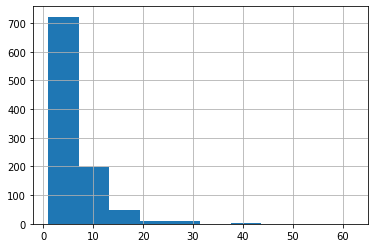

In [293]:
df_stock_market_reddit["score"].hist()

In [294]:
df_stock_market_reddit["rounded_score"] = df_stock_market_reddit["score"].apply(lambda x: 5 * round(x/5))

### Remove score, ups and downs and useless data from useful data for regression model
- only keeping `vectorized`

In [306]:
x = df_stock_market_reddit.drop(columns=["score", "rounded_score", "num_comments","ups", "downs", "title", "selftext", "processed_title_and_text"])
y = df_stock_market_reddit["rounded_score"]

### Split data into train and test

In [307]:
x = pd.DataFrame(x["vectorized_processed_title_and_text"].to_list())  # avoids errors

In [310]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [296]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_stock_market_reddit, df_stock_market_reddit, test_size=0.2, random_state=42)

In [298]:
x_train.head()

,score,title,ups,downs,num_comments,selftext,processed_title_and_text,vectorized_processed_title_and_text,rounded_score
909,4,Who here has the cajones to play JPM earnings ...,5,1,10,"If so, buy or sell?","[who, cajon, play, jpm, earn, tomorrow, ?, if,...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5
925,3,Possible inverted head and shoulders on the 60...,3,0,3,NaN,"[possibl, invert, head, shoulder, 60m, spi, ch...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5
974,3,Steve Wozniak says AAPL to $1000,3,0,12,"CNBC has him on at 2pm, they showed a clip of ...","[steve, wozniak, say, aapl, $, 1000, cnbc, 2pm...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5
765,5,GBP/JPY Trade Plan &amp; Outcome,7,2,6,This was a simple support and resistance play....,"[gbp/jpi, trade, plan, &, amp, ;, outcom, thi,...","[2, 6, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5
911,4,Najarian saying Aug 36 calls getting action on FB,6,2,4,Fast Money - Najarian saying he sees a roll in...,"[najarian, say, aug, 36, call, get, action, fb...","[2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5


In [301]:
x_train.to_csv("../datasets/StockMarket_train_2.csv")
x_test.to_csv("../datasets/StockMarket_validation_2.csv")

In [ ]:
pickle.id_to_word.

In [304]:
len(x_train["vectorized_processed_title_and_text"].loc[0]), len(id_to_word.token2id)

(6534, 6534)

## Notes
- Sparse
- T distributed stochastic neighbor embedding
- Create new column of label [1, 2, 3, ...], where 1 = 5*1 score = 5
- 1 = 5*2 score = 10

In [ ]:
from sklearn.linear_model import LogisticRegression



LR = LogisticRegression()
LR.fit(x_train, y_train)

In [312]:
y_prediction = LR.predict(x_test)

In [313]:
y_prediction

array([ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 10,  5,  5,
        5, 10,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 10,
        5,  5,  5,  5, 10,  5,  5,  5,  5, 10,  5,  5,  5,  5,  5,  5,  5,
       10,  5, 60,  5,  5,  5,  5,  5,  5,  5,  5,  5, 10,  5,  5,  5, 15,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5, 15,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5, 10,  5,  5,  5,  5,  5,  5,  5, 10,  5,  5,  5,  5, 10,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  0,  5,  5,  5,  5,
        5,  5, 10,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 10,  5,  5,  5,
        5,  5,  5,  5, 15,  5, 10,  5,  5,  5,  5, 10,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5, 10, 10,  5])

In [314]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("r2 score is ",score)
print("mean_sqrd_error is==",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  -1.206545843847977
mean_sqrd_error is== 36.4321608040201
root_mean_squared error of is== 6.035905963815217


## Save to memory and load from memory

In [315]:
len(id_to_word.token2id), LR.n_features_in_

(6534, 6534)

In [316]:
import pickle


pickle.dump(LR, open("../models/reddit_logistic_regression.sav", "wb"))

In [228]:
pickle.dump(id_to_word, open("../models/reddit_id_to_word.sav", "wb"))

In [29]:
loaded_model = pickle.load(open("../models/reddit_logistic_regression.sav", "rb"))
result = loaded_model.score(x_test, y_test)

# Twitter Tweet Future Popularity Prediction

In [173]:
df_twitter = pd.read_csv("../datasets/improved_scraped_tweets.csv",
            header=None,
            names=['author_id', 'created_at', 'id', 'text', 'retweet_count',
       'reply_count', 'like_count',
       'quote_count'])

In [163]:
df_twitter.head()

,author_id,created_at,id,text,retweet_count,reply_count,like_count,quote_count
0,1137766830297063424,2021-11-11T11:03:59.000Z,1458752361539817475,Principal Biostatistician – Nektar Therapeutic...,0,0,0,0
1,1889492676,2021-11-11T08:41:49.000Z,1458716581832232961,#NektarTherapeutics to Host Webcast Conference...,0,0,0,0
2,1979190776,2021-11-11T06:31:24.000Z,1458683762456375296,FY2021 EPS Estimates for Nektar Therapeutics C...,0,0,0,0
3,2860822496,2021-11-11T01:09:43.000Z,1458602807460646912,RT @WSlightly: https://t.co/IElfCuMgLd🇺🇸Nektar...,110,0,0,0
4,1315434407692509184,2021-11-10T16:01:06.000Z,1458464742390079489,Nektar Therapeutics current quarter revenue gr...,0,0,0,0


## Clean Data
- Keeping
    - `text`
    - `retweet_count`
    - `like_count`
    - `quote_count`

In [184]:
df_twitter.drop(columns=["author_id",
                         "created_at",
                         "id",
                         "reply_count"],
                inplace=True)

In [185]:
# deal with False error and nulls
df_twitter["retweet_count"].replace({"False": 0}, inplace=True)
df_twitter["retweet_count"] = df_twitter["retweet_count"].fillna(0).astype(int)

In [186]:
df_twitter.describe()

,retweet_count,like_count,quote_count
count,1276.000000,1276.000000,1276.000000
mean,102.409875,0.873041,0.020376
std,989.251396,4.530631,0.171430
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,2.250000,0.000000,0.000000
max,20690.000000,97.000000,3.000000


### Create vectors of posts
- [Tokenize](https://www.nltk.org/api/nltk.tokenize.html)
- Remove stopwords
- Get stem of each word
- [Generate vector space and vectors with bag of words](https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/ch04.html)

In [188]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


def process_tweet(text):
    """
    Returns list of stems of non-stopwords.
    """
    
    word_list = word_tokenize(str(text))
    
    filtered_words = [word for word in word_list if word not in stopwords.words("english")]
    
    ps = PorterStemmer()
    return [ps.stem(word) for word in filtered_words]

In [189]:
df_twitter["processed_text"] = df_twitter["text"].apply(lambda x: process_tweet(x))

In [190]:
import gensim


# generate IDs for all words
twitter_id_to_word = gensim.corpora.Dictionary(df_twitter["processed_text"])

In [247]:
import numpy as np


def vectorize_tweet(processed_text, id_to_word):
    """
    Returns vectors of processed text, using id_to_word.
    """
    
    dict_id_to_count = {i: 0 for i in range(len(id_to_word))}
    
    hits = id_to_word.doc2bow(processed_text)
    for hit in hits:
        dict_id_to_count[hit[0]] = hit[1]
    
    return np.array([v for v in dict_id_to_count.values()])

In [248]:
vectorize_tweet(df_twitter["processed_text"][0], twitter_id_to_word)

array([2, 1, 1, ..., 0, 0, 0])

In [193]:
df_twitter["vectorized_processed_text"] = df_twitter["processed_text"].apply(lambda x: vectorize_tweet(x, twitter_id_to_word))

In [194]:
df_twitter.head()

,text,retweet_count,like_count,quote_count,processed_text,vectorized_processed_text
0,Principal Biostatistician – Nektar Therapeutic...,0,0,0,"[princip, biostatistician, –, nektar, therapeu...","[2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,#NektarTherapeutics to Host Webcast Conference...,0,0,0,"[#, nektartherapeut, host, webcast, confer, ca...","[3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,FY2021 EPS Estimates for Nektar Therapeutics C...,0,0,0,"[fy2021, ep, estim, nektar, therapeut, cut, an...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,RT @WSlightly: https://t.co/IElfCuMgLd🇺🇸Nektar...,110,0,0,"[rt, @, wslightli, :, http, :, //t.co/ielfcumg...","[6, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,Nektar Therapeutics current quarter revenue gr...,0,0,0,"[nektar, therapeut, current, quarter, revenu, ...","[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Score Tweets

In [195]:
def score_tweet(retweet_count, quote_count, like_count):
    return retweet_count + quote_count + like_count

In [196]:
df_twitter["score"] = df_twitter.apply(lambda x: score_tweet(x.retweet_count,
                                                             x.quote_count,
                                                             x.like_count),
                                       axis=1)

## Logistic Regression
- Labels for each input
- Can set upper bound with >100 score
- Use histogram to get an idea of quartiles

<AxesSubplot:>

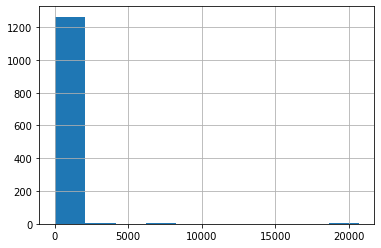

In [197]:
df_twitter["score"].hist()

In [198]:
df_twitter["rounded_score"] = df_twitter["score"].apply(lambda x: 5 * round(x/5))

In [199]:
df_twitter.head()

,text,retweet_count,like_count,quote_count,processed_text,vectorized_processed_text,score,rounded_score
0,Principal Biostatistician – Nektar Therapeutic...,0,0,0,"[princip, biostatistician, –, nektar, therapeu...","[2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,0
1,#NektarTherapeutics to Host Webcast Conference...,0,0,0,"[#, nektartherapeut, host, webcast, confer, ca...","[3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0
2,FY2021 EPS Estimates for Nektar Therapeutics C...,0,0,0,"[fy2021, ep, estim, nektar, therapeut, cut, an...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0
3,RT @WSlightly: https://t.co/IElfCuMgLd🇺🇸Nektar...,110,0,0,"[rt, @, wslightli, :, http, :, //t.co/ielfcumg...","[6, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",110,110
4,Nektar Therapeutics current quarter revenue gr...,0,0,0,"[nektar, therapeut, current, quarter, revenu, ...","[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0


### Remove score, ups and downs and useless data from useful data for regression model
- only keeping `vectorized_processed_text`

In [201]:
x = df_twitter["vectorized_processed_text"]
y = df_twitter["rounded_score"]

### Split data into train and test

In [202]:
x = pd.DataFrame(x.to_list())  # avoids errors

In [203]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [214]:
x_train

0     1     2     3     4     5     6     7     8     9     10    11    \
984      0     0     0     0     0     0     0     0     0     0     0     0   
415      0     0     0     0     0     0     0     0     0     0     0     0   
780      0     0     0     0     0     0     0     0     0     0     0     0   
919      0     0     0     0     0     0     0     0     0     0     0     0   
96       0     0     0     0     0     0     0     0     0     0     0     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1044     0     0     0     0     0     0     0     0     0     0     0     0   
1095     0     0     0     0     0     0     0     0     0     0     0     0   
1130     0     0     0     0     0     0     0     0     0     0     0     0   
860      0     1     0     0     1     0     0     0     0     0     0     0   
1126     0     0     0     0     0     0     0     0     0     0     0     0   

      12    13    14    15    16    17    18    19    20    21    22    23    \
984      0     0     0     0     0     0     0     0     0     0     0     0   
415      0     0     0     0     0     0     0     0     0     0     0     0   
780      0     0     0     0     0     0     0     0     0     0     0     0   
919      0     0     0     0     0     0     0     0     0     0     0     0   
96       0     0     0     0     0     0     0     0     0     0     0     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1044     0     0     0     0     0     0     0     0     0     0     0     0   
1095     0     0     0     0     0     0     0     0     0     0     0     0   
1130     0     0     0     0     0     0     0     0     0     0     0     0   
860      0     0     0     0     0     0     0     0     0     0     0     0   
1126     0     0     0     0     0     0     0     0     0     0     0     0   

      24    25    26    27    28    29    30    31    32    33    34    35    \
984      0     0     0     0     0     0     0     0     0     0     0     0   
415      0     0     0     0     0     0     0     0     0     0     0     0   
780      0     0     0     0     0     0     0     0     0     0     0     0   
919      0     0     0     0     0     0     0     0     0     0     0     0   
96       0     0     0     0     0     0     0     0     0     0     0     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1044     0     0     0     0     0     0     0     0     0     0     0     0   
1095     0     0     0     0     0     0     0     0     0     0     0     0   
1130     0     0     0     0     0     0     0     0     0     0     0     0   
860      0     0     0     0     1     0     0     0     0     0     0     0   
1126     0     0     0     0     0     0     0     0     0     0     0     0   

      36    37    38    39    40    41    42    43    44    45    46    47    \
984      0     0     0     0     0     0     0     0     0     0     0     0   
415      0     0     0     0     0     0     0     0     0     0     0     0   
780      0     0     0     0     0     0     0     0     0     0     0     0   
919      0     0     0     0     0     0     0     0     0     0     0     0   
96       0     0     0     0     0     0     0     0     0     0     0     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1044     0     0     0     0     0     0     0     0     0     0     0     0   
1095     0     0     0     0     0     0     0     0     0     0     0     0   
1130     0     0     0     0     0     0     0     0     0     0     0     0   
860      0     0     0     0     0     0     0     0     0     0     0     0   
1126     0     0     0     0     0     0     0     0     0     0     0     0   

      48    49    50    51    52    53    54    55    56    57    58    59    \
984      0     0     0     0     0     0     0     0     0     0     0     0   
41

In [215]:
# to store train and test data for later just in case
a, b, c, d = train_test_split(df_twitter, df_twitter, test_size=0.2, random_state=42)
a.to_csv("../datasets/scraped_tweets_train.csv", index=None)
b.to_csv("../datasets/scraped_tweets_validation.csv", index=None)

In [255]:
a.loc[0].text

'Principal Biostatistician – Nektar Therapeutics – San Francisco, CA: Provides independent program level statistical expertise and leadership in clinical development of a compound in early phase ... #BayArea #Biotech https://t.co/RfQKHxrvPX'

In [204]:
from sklearn.linear_model import LogisticRegression



LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [205]:
y_prediction = LR.predict(x_test)

In [206]:
y_prediction

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 175,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   5,   0,   0,   0,   0,
        40,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [207]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


score=r2_score(y_test,y_prediction)
print("r2 score is ",score)
print("mean_sqrd_error is==",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  -0.019568530369334702
mean_sqrd_error is== 700125.5859375
root_mean_squared error of is== 836.7350751208533


## Save to memory and load from memory

In [208]:
pickle.dump(LR, open("../models/twitter_logistic_regression.sav", "wb"))

In [225]:
pickle.dump(twitter_id_to_word, open("../models/twitter_id_to_word.sav", "wb"))

In [209]:
loaded_model = pickle.load(open("../models/twitter_logistic_regression.sav", "rb"))
result = loaded_model.score(x_test, y_test)

In [212]:
loaded_model.predict(x_test)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 175,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   5,   0,   0,   0,   0,
        40,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [239]:
id2w = pickle.load(open("../models/twitter_id_to_word.sav", "rb"))

In [249]:
twitter_id_to_word.token2id

{'#': 0,
 ',': 1,
 '...': 2,
 '//t.co/rfqkhxrvpx': 3,
 ':': 4,
 'bayarea': 5,
 'biostatistician': 6,
 'biotech': 7,
 'ca': 8,
 'clinic': 9,
 'compound': 10,
 'develop': 11,
 'earli': 12,
 'expertis': 13,
 'francisco': 14,
 'http': 15,
 'independ': 16,
 'leadership': 17,
 'level': 18,
 'nektar': 19,
 'phase': 20,
 'princip': 21,
 'program': 22,
 'provid': 23,
 'san': 24,
 'statist': 25,
 'therapeut': 26,
 '–': 27,
 '$': 28,
 '&': 29,
 '//t.co/yessr3zaio': 30,
 '36th': 31,
 ';': 32,
 'amp': 33,
 'analyst': 34,
 'annual': 35,
 'call': 36,
 'cancer': 37,
 'confer': 38,
 'dure': 39,
 'host': 40,
 'investor': 41,
 'meet': 42,
 'nektartherapeut': 43,
 'nktr': 44,
 'sitc21': 45,
 'specialist': 46,
 'webcast': 47,
 '//t.co/2vgqtndehi': 48,
 'cut': 49,
 'ep': 50,
 'estim': 51,
 'fy2021': 52,
 '//t.co/ielfcumgld🇺🇸nektar🇪🇺therapeut': 53,
 '@': 54,
 'autoimmun': 55,
 'covid19': 56,
 'immune2canc': 57,
 'immunotherapi': 58,
 'inflammatori': 59,
 'mela…': 60,
 'myeloma': 61,
 'rt': 62,
 'wslightli': 

In [250]:
id2w.token2id

{'#': 0,
 ',': 1,
 '...': 2,
 '//t.co/rfqkhxrvpx': 3,
 ':': 4,
 'bayarea': 5,
 'biostatistician': 6,
 'biotech': 7,
 'ca': 8,
 'clinic': 9,
 'compound': 10,
 'develop': 11,
 'earli': 12,
 'expertis': 13,
 'francisco': 14,
 'http': 15,
 'independ': 16,
 'leadership': 17,
 'level': 18,
 'nektar': 19,
 'phase': 20,
 'princip': 21,
 'program': 22,
 'provid': 23,
 'san': 24,
 'statist': 25,
 'therapeut': 26,
 '–': 27,
 '$': 28,
 '&': 29,
 '//t.co/yessr3zaio': 30,
 '36th': 31,
 ';': 32,
 'amp': 33,
 'analyst': 34,
 'annual': 35,
 'call': 36,
 'cancer': 37,
 'confer': 38,
 'dure': 39,
 'host': 40,
 'investor': 41,
 'meet': 42,
 'nektartherapeut': 43,
 'nktr': 44,
 'sitc21': 45,
 'specialist': 46,
 'webcast': 47,
 '//t.co/2vgqtndehi': 48,
 'cut': 49,
 'ep': 50,
 'estim': 51,
 'fy2021': 52,
 '//t.co/ielfcumgld🇺🇸nektar🇪🇺therapeut': 53,
 '@': 54,
 'autoimmun': 55,
 'covid19': 56,
 'immune2canc': 57,
 'immunotherapi': 58,
 'inflammatori': 59,
 'mela…': 60,
 'myeloma': 61,
 'rt': 62,
 'wslightli': 

In [191]:
import numpy as np


def vectorize_tweet(processed_text, id_to_word):
    """
    Returns vectors of processed text, using id_to_word.
    """
    
    dict_id_to_count = {i: 0 for i in range(len(id_to_word))}
    
    hits = id_to_word.doc2bow(processed_text)
    for hit in hits:
        dict_id_to_count[hit[0]] = hit[1]
    
    return np.array([v for v in dict_id_to_count.values()])

In [251]:
vectorize_tweet(df_twitter["processed_text"][0], twitter_id_to_word)

array([2, 1, 1, ..., 0, 0, 0])

In [252]:
vectorize_tweet(df_twitter["processed_text"][0], id2w)

array([2, 1, 1, ..., 0, 0, 0])

In [191]:
import numpy as np


def vectorize_tweet(processed_text, id_to_word):
    """
    Returns vectors of processed text, using id_to_word.
    """
    
    dict_id_to_count = {i: 0 for i in range(len(id_to_word))}
    
    hits = id_to_word.doc2bow(processed_text)
    for hit in hits:
        dict_id_to_count[hit[0]] = hit[1]
    
    return np.array([v for v in dict_id_to_count.values()])

In [241]:
df_twitter["processed_text"][0]

['princip',
 'biostatistician',
 '–',
 'nektar',
 'therapeut',
 '–',
 'san',
 'francisco',
 ',',
 'ca',
 ':',
 'provid',
 'independ',
 'program',
 'level',
 'statist',
 'expertis',
 'leadership',
 'clinic',
 'develop',
 'compound',
 'earli',
 'phase',
 '...',
 '#',
 'bayarea',
 '#',
 'biotech',
 'http',
 ':',
 '//t.co/rfqkhxrvpx']

In [238]:
vectorize_tweet(df_twitter["processed_text"][0], twitter_id_to_word)

array([2, 1, 1, ..., 0, 0, 0])